### 標譜線
湯底是紅魚的 fake_script_haha.ipynb  
從他 github 上抓下來的  
可能進行一些改動  
主要是這個 cube 太他媽巨寬了，CARTA line query 找不太動  

處理的 cube : 
從 ESO 上抓下來的，觀測儀器是 MUSE(single)  
統一使用波長單位（補藥換成頻率啊）      
pID = 094.B-0321

In [39]:
# modular
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [40]:
# get data file
file_path = "/Users/aqing/Documents/1004/Circinus_galaxy/ionized-gas/VLT/MUSE_circinus_cube_axis-WaveLength_gasRegion.tsv" # inp .tsv

# df = data file
df = pd.read_csv(file_path, sep="\t", skiprows=5) # 打開 .tsv 看看，前五行需要跳過
df.columns = [col.strip().lstrip("#").strip() for col in df.columns]
df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce') # 「 df.coiumns[0] 」代表第0欄的藍標題，就和df['FREQ']這是一個意思
df[df.columns[1]] = pd.to_numeric(df[df.columns[1]], errors='coerce') # pd.to_numeric(errors='coerce') 在遇到不是數字的直的時候，標記為 NaN
df = df.dropna()

x = df[df.columns[0]] # 處理過後再讀入變數
y = df[df.columns[1]] 
'''
xlabel = AirWavelength (Angstrom)
ylabel = Mean [10(-20).erg/s/cm2/Angstrom]
'''

'\nxlabel = AirWavelength (Angstrom)\nylabel = Mean [10(-20).erg/s/cm2/Angstrom]\n'

In [41]:
# Line info

z = 0.001448 # redshift of Circinus

# (shifted_wave_lenght [Ang], line_name, color)
bpt_lines = [((1+z)*6584, 'N[II]', 'r'),
             ((1+z)*6563, 'H-alpha', (1, 0.5, 0)),
             ((1+z)*5007, 'O[III]', 'c'),
             ((1+z)*4861, 'H-beta', 'b')]

for l, n, _ in bpt_lines:
    print(f'{n} : shifted wave lenght = {l:.2f} Å ')

N[II] : shifted wave lenght = 6593.53 Å 
H-alpha : shifted wave lenght = 6572.50 Å 
O[III] : shifted wave lenght = 5014.25 Å 
H-beta : shifted wave lenght = 4868.04 Å 


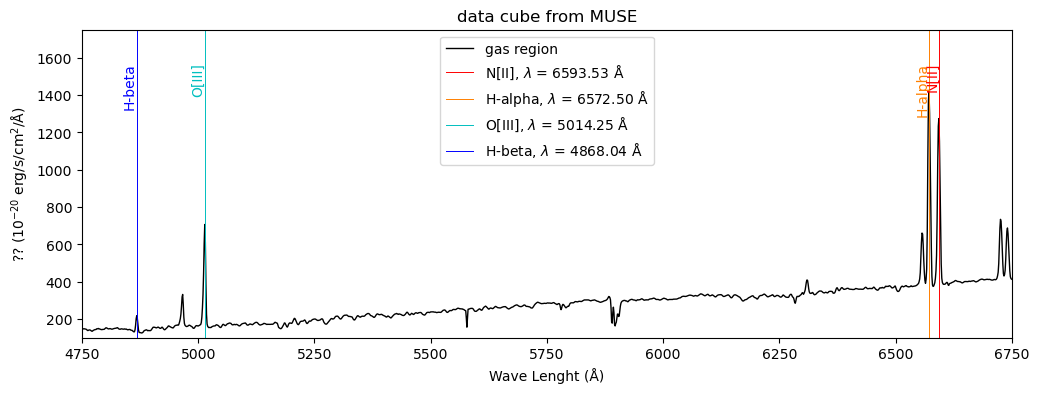

In [50]:
# four lines
# 我跟你說，全部畫一張圖的下場就是一坨

plt.figure(figsize=(12, 4))
plt.plot(x, y, c='k', lw=1, label="gas region")
plt.xlim(4750, 6750) # Ang
ymax = 1750
plt.ylim(100, ymax) # 超可悲之隨便設變數
plt.xlabel("Wave Lenght (Å)")
plt.ylabel(r"?? ($10^{-20}$ erg/s/cm$^2$/Å)") # 倆 $ 啟用 latex
plt.title("data cube from MUSE")

for l, name, color in bpt_lines :
    plt.axvline(l, color=color, linestyle="-", lw=0.7, label=f'{name}, $\lambda$ = {l:.2f} Å')
    if name == 'N [II]' :
        plt.text(l, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='left', va='top')
    else :
        plt.text(l, ymax*0.9, name, rotation=90, color=color, fontsize=10, ha='right', va='top')

plt.legend()
plt.show()

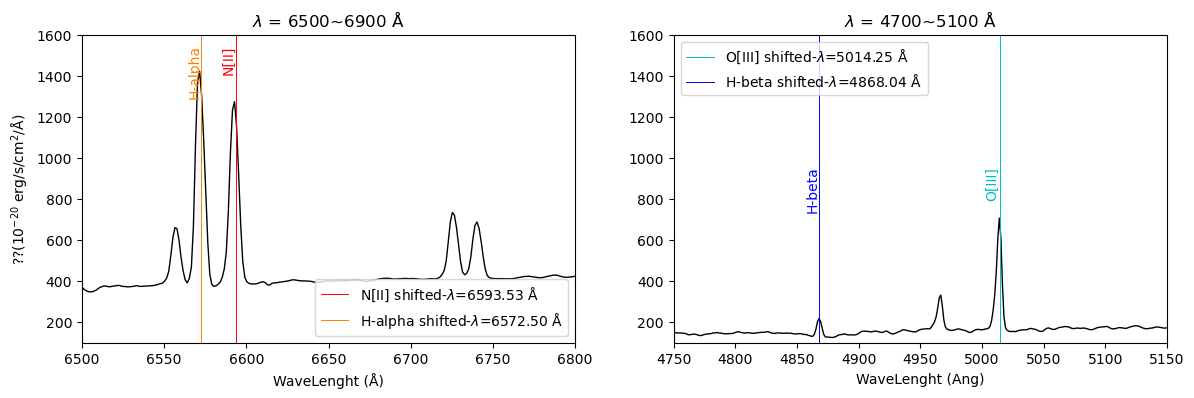

In [52]:
# bpt 的橫軸縱軸分開畫耶耶

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, y, c='k', lw=1)
ax[0].set_xlim(6500, 6800) # [Ang]
ymax = 1600
ax[0].set_ylim(100, ymax)
ax[0].set_xlabel("WaveLenght (Å)")
ax[0].set_ylabel("??($10^{-20}$ erg/s/cm$^2$/Å)")
ax[0].set_title("$\lambda$ = 6500~6900 Å")
for l, name, c in bpt_lines :
    if name in ['H-alpha', 'N[II]'] :
        ax[0].axvline(l, color=c, linestyle="-", lw=0.7, label=f'{name} shifted-$\lambda$={l:.2f} Å') # :.2f 代表顯示兩位浮點數
        ax[0].text(l, ymax*0.97, name, rotation=90, color=c, fontsize=10, ha='right', va='top')
ax[0].legend(loc='lower right')

ax[1].plot(x, y, c='k', lw=1)
ax[1].set_xlim(4750, 5150) # [Ang]
ymax = 1600
ax[1].set_ylim(100, ymax)
ax[1].set_xlabel("WaveLenght (Ang)")
ax[1].set_ylabel('')
ax[1].set_title("$\lambda$ = 4700~5100 Å")
for l, name, c in bpt_lines :
     if name in ['H-beta', 'O[III]']:
        ax[1].axvline(l, color=c, linestyle="-", lw=0.7, label=f'{name} shifted-$\lambda$={l:.2f} Å')
        ax[1].text(l, ymax*0.6, name, rotation=90, color=c, fontsize=10, ha='right', va='top')
ax[1].legend(loc='upper left')

plt.show()